### Problem Statement:

Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', None)

### Importing the dataset:

In [3]:
# Loading dataset
df = pd.read_csv(r'F:\SHUBHAM\AV\BigMart Sales\train_v9rqX0R.csv')

In [4]:
# Cheking dimension of the dataset
df.shape

(8523, 12)

In [5]:
# Displaying the first few rows rom the dataset to understand the data
df.head(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# Statistical Summary of the data
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:>

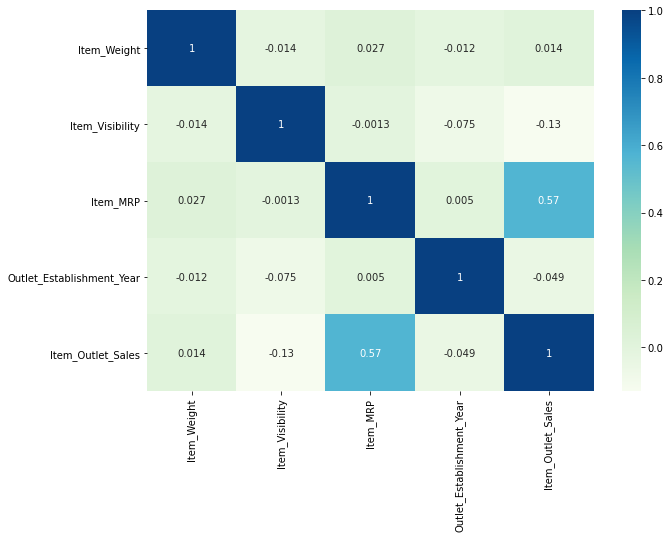

In [8]:
# Creating a correlation matrix of the numeric features from the dataset.
plt.figure(figsize= (10, 7))
sns.heatmap(df.corr(), annot=True, cmap="GnBu")

#### We can see that there is not a strong correlation of numeric features with respect to target variables as well as no multicolinearity.

### Data Preprocessing:

In [9]:
# Checking for null values in Dataset
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### There are null values present in features 'Item_Weight' and 'Outlet_Location_Type'. But we will deal with them after understanding the data more through EDA.

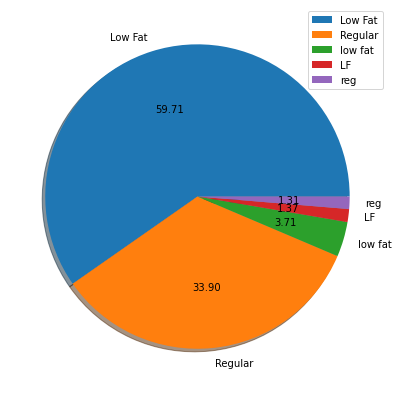

In [10]:
#Item_Fat_Content

plt.figure(figsize=(7, 7))
plt.pie(df.Item_Fat_Content.value_counts(), labels=df.Item_Fat_Content.unique(), shadow=True, autopct='%1.2f')
plt.legend()
plt.show()

#### In above pie chart, we can see that there are two levels which are Low Fat and Regular Fat. 
#### The items which comes under the category of 'Low Fat' is around 64.79% and that of 'Regular Fat' are of 35.21%
#### It tells us that around 65% of items belongs to the "Low Fat" item category.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

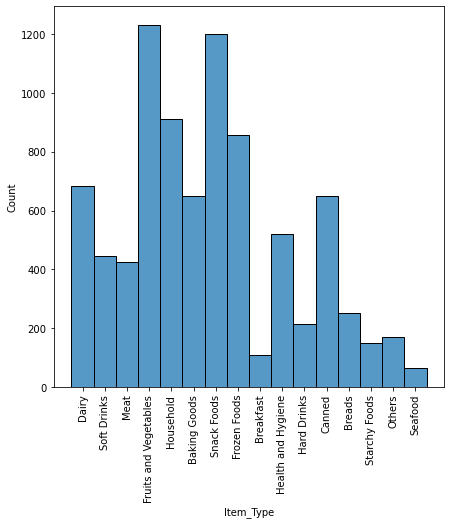

In [11]:
# Item_Type

plt.figure(figsize=(7, 7))
sns.histplot(df.Item_Type)
plt.xticks(rotation = 90)

#### The sale of items which belongs to type 'Fruits and Vegetables' and 'Snack Foods' is higher than the other items.
#### Whereas the sale of items 'Breakfast' and 'seafood' is very low compared to other items.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

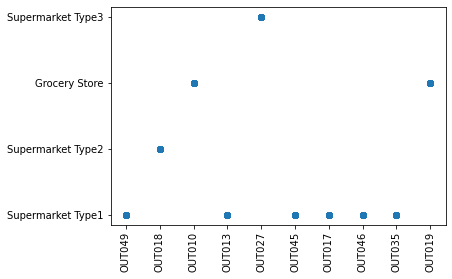

In [12]:
#Outlet_Identifier

plt.scatter(df.Outlet_Identifier, df.Outlet_Type)
plt.xticks(rotation = 90)

#### Here we can see that 'Outlet_Identifier' can be compared to 'Outlet_Type' to check which type of outlet is it.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

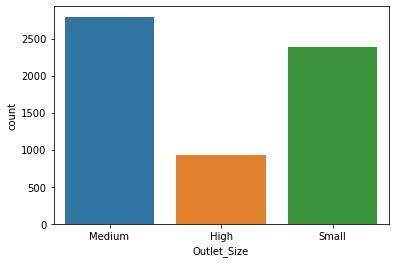

In [13]:
# Outlet_Size

sns.countplot('Outlet_Size',data=df)

#### Most of the outlets are of 'Medium' size whereas the outlets having 'High' (large) size is very low in numbers.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

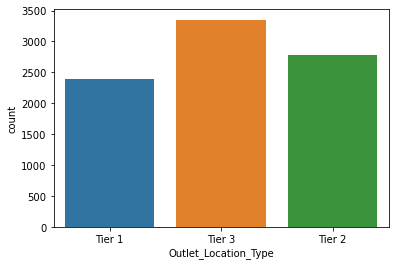

In [14]:
#Outlet_Location_Type

sns.countplot('Outlet_Location_Type',data=df)

#### The number of outlets in Tier-3 is higher than the count of other two tiers.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

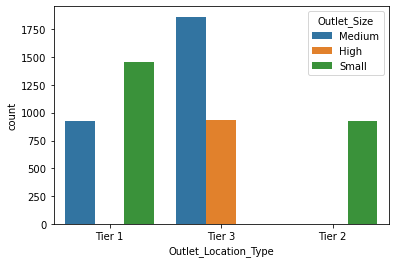

In [15]:
# Now we will check relation of 'Outlet_Location_Type' with 'Outlet_Size'

sns.countplot('Outlet_Location_Type',hue='Outlet_Size',data=df)

#### Here, we can see that for Tier- 1 location, the size of outlet is either medium or small.
#### For Tier-3 location the size of outlet is either medium or high.
#### But for  Tier-2 location the outlet size is only 'small'. We will use this while handling null values.

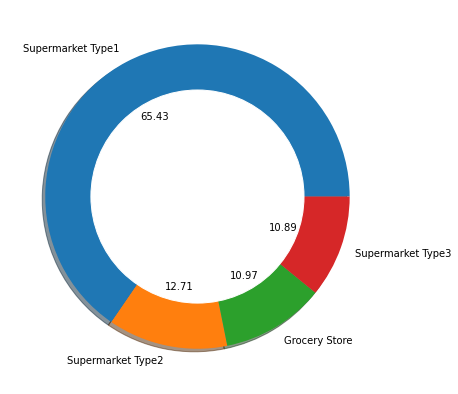

In [16]:
# Outlet_Type

plt.figure(figsize=(7, 7))
plt.pie(df.Outlet_Type.value_counts(), labels=df.Outlet_Type.unique(), shadow=True, autopct='%1.2f')
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

#### Most of the outlets are of Supermarket type 1 which is almost 65.43% out of all the types of outlets.
#### Then comes Supermarket type 2 with 12.71% of the total outlets.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

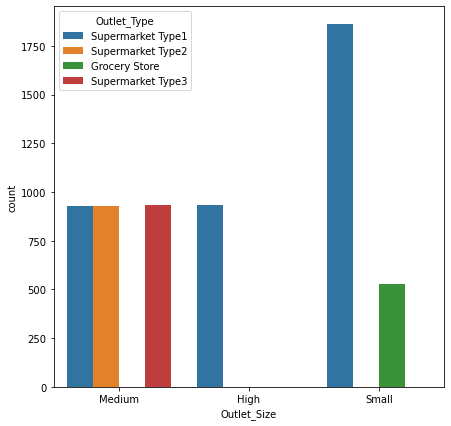

In [17]:
# Now we will check relation of 'Outlet_Type' with 'Outlet_Size'

plt.figure(figsize=(7, 7))
sns.countplot('Outlet_Size',hue='Outlet_Type',data=df)

#### Medium size outlets are of Supermarket Type1, Supermarket Type2 and Supermarket Type3 which are almost same in number.
#### High (Large) size outlets are all consist of Supermarket Type1.
#### While small size outlets consist of Supermarket Type1 and Grocery Store.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Grocery Store'),
  Text(1, 0, 'Supermarket Type1'),
  Text(2, 0, 'Supermarket Type2'),
  Text(3, 0, 'Supermarket Type3')])

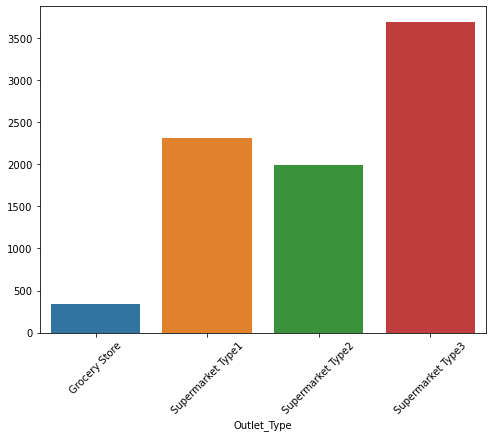

In [18]:
# Item_Outlet_Sales wrt Outlet_Type

Mean_sale_Outlet_Type = df['Item_Outlet_Sales'].groupby(df.Outlet_Type).mean()

plt.figure(figsize=(8,6))
sns.barplot(Mean_sale_Outlet_Type.index, Mean_sale_Outlet_Type.values)
plt.xticks(rotation=45)

#### Most of sale comes from 'Supermarket Type1' , 'Supermarket Type2' and 'Supermarket Type3', while sales from 'Grocery store' is very low.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Baking Goods'),
  Text(1, 0, 'Breads'),
  Text(2, 0, 'Breakfast'),
  Text(3, 0, 'Canned'),
  Text(4, 0, 'Dairy'),
  Text(5, 0, 'Frozen Foods'),
  Text(6, 0, 'Fruits and Vegetables'),
  Text(7, 0, 'Hard Drinks'),
  Text(8, 0, 'Health and Hygiene'),
  Text(9, 0, 'Household'),
  Text(10, 0, 'Meat'),
  Text(11, 0, 'Others'),
  Text(12, 0, 'Seafood'),
  Text(13, 0, 'Snack Foods'),
  Text(14, 0, 'Soft Drinks'),
  Text(15, 0, 'Starchy Foods')])

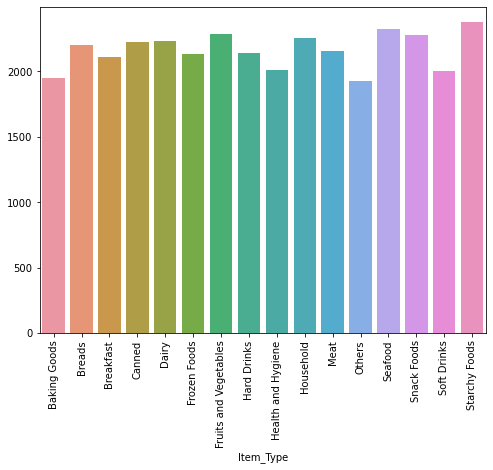

In [19]:
# Item_Outlet_Sales wrt Outlet_Type

Mean_sale_Item_Type = df['Item_Outlet_Sales'].groupby(df.Item_Type).mean()

plt.figure(figsize=(8,6))
sns.barplot(Mean_sale_Item_Type.index, Mean_sale_Item_Type.values)
plt.xticks(rotation = 90)

#### Here we can see that all the items bring same amount of sales irrespective of there count of sale.
#### We saw that count of  Breakfast and Seafood items was very low, but amount of sale they generate is of equal to others.

### Now we will handle the null values

In [20]:
# Checking for null values in Dataset
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [21]:
# Handling null values of Item_Weight column
# Here we will replace the null values with median values of weight to avoid impact of outlier in future.
df.Item_Weight.fillna(df.Item_Weight.median(), inplace = True)

In [22]:
# Now we will check for null values in Outlet_Size column
# Cheking levels of feature Outlet_Size
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

#### While observing the data, I came to know that there is a relation between 'Outlet_Size' and 'Outlet_Location_Type' feature.

In [23]:
df.Outlet_Location_Type[df.Outlet_Size.isna()].value_counts()

Tier 2    1855
Tier 3     555
Name: Outlet_Location_Type, dtype: int64

In [24]:
df.Outlet_Size[df.Outlet_Location_Type == 'Tier 2'].value_counts()

Small    930
Name: Outlet_Size, dtype: int64

#### Here, we can see that for the feature 'Outlet_Size', most of the null value belongs to 'Tier 2' category of 'Outlet_Location_Type' feature and all Outlet_Size are 'Small' for 'Tier 2' category.

#### So first we will replace all the 'Null' values of 'Outlet_Size' feature with 'Small' for 'Tier 2' Outlet location type.

In [25]:
df.Outlet_Size.isnull().sum()

2410

In [26]:
# Filling the null values of 'Outlet_Size' which belongs to tier-2 'Outlet_Location_Type'.
df.Outlet_Size[df.Outlet_Location_Type == 'Tier 2'] = df.Outlet_Size[df.Outlet_Location_Type == 'Tier 2'].fillna('Small')

<ipython-input-26-29d7a470420d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Outlet_Size[df.Outlet_Location_Type == 'Tier 2'] = df.Outlet_Size[df.Outlet_Location_Type == 'Tier 2'].fillna('Small')


In [27]:
df.Outlet_Size.isnull().sum()

555

In [28]:
# Now we can see that the null values are reduced.
# Once again we will look for relation between the null values 
df.Outlet_Location_Type[df.Outlet_Size.isna()].value_counts()

Tier 3    555
Name: Outlet_Location_Type, dtype: int64

In [29]:
df.Outlet_Size[df.Outlet_Location_Type == 'Tier 3'].value_counts()

Medium    1863
High       932
Name: Outlet_Size, dtype: int64

In [30]:
# Here we will directly replace the remaining null values of 'Outlet_Size' feature
# with 'Medium' since it is the most repeated("Mode") value.

df.Outlet_Size[df.Outlet_Location_Type == 'Tier 3'] = df.Outlet_Size[df.Outlet_Location_Type == 'Tier 3'].fillna('Medium')

<ipython-input-30-428b307964fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Outlet_Size[df.Outlet_Location_Type == 'Tier 3'] = df.Outlet_Size[df.Outlet_Location_Type == 'Tier 3'].fillna('Medium')


In [31]:
df.Outlet_Size.isnull().sum()

0

In [32]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [33]:
# There are no Null calues in the Dataset.
#df.head(10)

In [34]:
#Reset index
df = df.reset_index(drop = True)

In [35]:
df.shape

(8523, 12)

In [36]:
# Now we will handle our categorical data

In [37]:
df.drop('Item_Identifier', axis = 1, inplace = True)

In [38]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [39]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [40]:
# From above we can see that there are 5 levels(categories) in the Item_Fat_Content feature. 
# But if we look closely there are only two actual levels in the feature i.e. Low Fat and Regular Fat.
# So we will convert other levels into these two on basis of given information.

df.Item_Fat_Content = df.Item_Fat_Content.replace(['LF', 'low fat', 'reg'], ['Low Fat', 'Low Fat', 'Regular'] )
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [41]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [42]:
df.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [43]:
df.Outlet_Size.value_counts()

Small     4243
Medium    3348
High       932
Name: Outlet_Size, dtype: int64

In [44]:
df.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [45]:
df.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [46]:
#df.head(15)

In [47]:
#data = df.copy()

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le = LabelEncoder()

In [50]:
#df.Item_Identifier = le.fit_transform(df.Item_Identifier)

In [51]:
df.Item_Fat_Content = le.fit_transform(df.Item_Fat_Content)

In [52]:
df.Item_Type = le.fit_transform(df.Item_Type)

In [53]:
df.Outlet_Identifier = le.fit_transform(df.Outlet_Identifier)

In [54]:
df.Outlet_Size = le.fit_transform(df.Outlet_Size)

In [55]:
df.Outlet_Location_Type = le.fit_transform(df.Outlet_Location_Type)

In [56]:
df.Outlet_Type = le.fit_transform(df.Outlet_Type)

In [57]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


<AxesSubplot:>

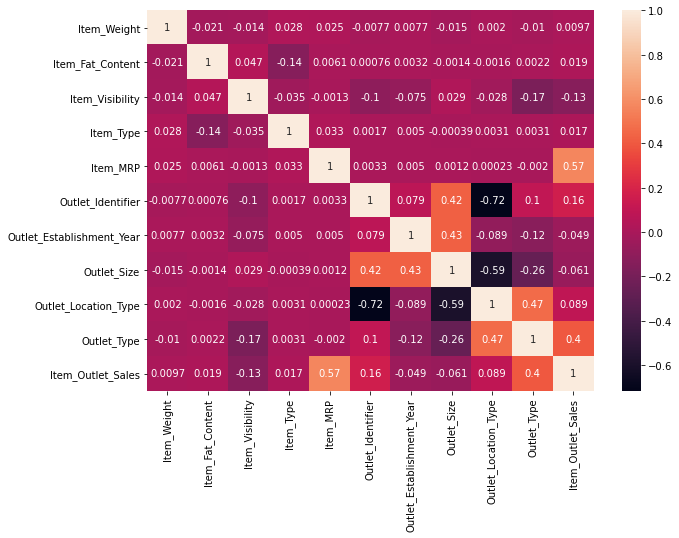

In [58]:
plt.figure(figsize= (10, 7))
sns.heatmap(df.corr(), annot=True)

#### Now we will do the same preprocessing on test data:

In [59]:
test_x = pd.read_csv(r'F:\SHUBHAM\AV\BigMart Sales\test_AbJTz2l.csv')

In [60]:
test_x.shape

(5681, 11)

In [61]:
# Checking for null values in Dataset
test_x.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [62]:
# Handling null values of Item_Weight column
test_x.Item_Weight.fillna(test_x.Item_Weight.median(), inplace = True)

In [63]:
#Here, we can see that for the feature 'Outlet_Size', the most null value belongs to 'Tier 2' category of 'Outlet_Location_Type' feature and all Outlet_Size are 'Small' for 'Tier 2' category.
#So first we will replace all the 'Null' values of 'Outlet_Size' feature with 'Small' for 'Tier 2' Outlet location type.

test_x.Outlet_Size[test_x.Outlet_Location_Type == 'Tier 2'] = test_x.Outlet_Size[test_x.Outlet_Location_Type == 'Tier 2'].fillna('Small')

<ipython-input-63-d16ec68d5e6e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x.Outlet_Size[test_x.Outlet_Location_Type == 'Tier 2'] = test_x.Outlet_Size[test_x.Outlet_Location_Type == 'Tier 2'].fillna('Small')


In [64]:
# Here we will directly replace the remaining null values of 'Outlet_Size' feature
# with 'Medium' since it is the most repeated value.

test_x.Outlet_Size[test_x.Outlet_Location_Type == 'Tier 3'] = test_x.Outlet_Size[test_x.Outlet_Location_Type == 'Tier 3'].fillna('Medium')

<ipython-input-64-6305612e338a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x.Outlet_Size[test_x.Outlet_Location_Type == 'Tier 3'] = test_x.Outlet_Size[test_x.Outlet_Location_Type == 'Tier 3'].fillna('Medium')


In [65]:
test_x.drop('Item_Identifier', axis = 1, inplace = True)

In [66]:
test_x.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [67]:
# From above we can see that there are 5 levels(categories) in the Item_Fat_Content feature. 
# But if we look closely there are only two actual levels in the feature i.e. Low Fat and Regular Fat.
# So we will convert other levels into these two on basis of given information.

test_x.Item_Fat_Content = test_x.Item_Fat_Content.replace(['LF', 'low fat', 'reg'], ['Low Fat', 'Low Fat', 'Regular'] )
test_x.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [68]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#test.Item_Identifier = le.fit_transform(test.Item_Identifier)

test_x.Item_Fat_Content = le.fit_transform(test_x.Item_Fat_Content)

test_x.Item_Type = le.fit_transform(test_x.Item_Type)

test_x.Outlet_Identifier = le.fit_transform(test_x.Outlet_Identifier)

test_x.Outlet_Size = le.fit_transform(test_x.Outlet_Size)

test_x.Outlet_Location_Type = le.fit_transform(test_x.Outlet_Location_Type)

test_x.Outlet_Type = le.fit_transform(test_x.Outlet_Type)

test_x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,0,0.007565,13,107.8622,9,1999,1,0,1
1,8.300,1,0.038428,4,87.3198,2,2007,2,1,1
2,14.600,0,0.099575,11,241.7538,0,1998,1,2,0
3,7.315,0,0.015388,13,155.0340,2,2007,2,1,1
4,12.500,1,0.118599,4,234.2300,5,1985,1,2,3


In [69]:
# Now we will import actual values of test prediction data
sample = pd.read_csv(r'F:\SHUBHAM\AV\BigMart Sales\sample_submission_8RXa3c6.csv')
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [70]:
test_y = sample[['Item_Outlet_Sales']]
test_y.head()

,Item_Outlet_Sales
0,1000
1,1000
2,1000
3,1000
4,1000


In [71]:
# Now we will split our data in train and test

In [72]:
X = df.drop('Item_Outlet_Sales', axis=1)
Y = df[['Item_Outlet_Sales']]

In [73]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1
1,5.92,1,0.019278,14,48.2692,3,2009,1,2,2
2,17.50,0,0.016760,10,141.6180,9,1999,1,0,1
3,19.20,1,0.000000,6,182.0950,0,1998,1,2,0
4,8.93,0,0.000000,9,53.8614,1,1987,0,2,1


In [74]:
Y.head()

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### Linear Regression:

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lin_reg = LinearRegression()

In [78]:
lin_reg.fit(X, Y)

LinearRegression()

In [79]:
pred_lin = lin_reg.predict(test_x)

In [80]:
pred_lin

array([[1915.53313321],
       [1076.1240335 ],
       [2315.11585962],
       ...,
       [1733.06452688],
       [3124.13251925],
       [1136.41346632]])

In [81]:
lin_reg.coef_

array([[-6.85557360e-02,  5.86436052e+01, -1.71736267e+03,
        -9.01190938e-01,  1.55660785e+01,  5.56601261e+01,
        -2.42683200e+00, -3.71681779e+01, -8.80459231e+01,
         8.54187619e+02]])

In [126]:
pred_lin[pred_lin < 0]

array([-4.98172163e+02, -9.01781126e+02, -2.85489063e+02, -7.33089540e+02,
       -1.59721657e+02, -4.68421477e+02, -7.84539848e+02, -3.48526134e+02,
       -3.62317001e+01, -4.00494593e+02, -4.45563889e+02, -6.38524895e+01,
       -9.27718746e+02, -7.44992026e+02, -1.23493762e+02, -1.05671081e+02,
       -9.25988132e+02, -8.61248106e+02, -7.94805165e+02, -7.47172220e+02,
       -6.12707205e+02, -7.40888364e+02, -6.39716541e+02, -5.10320479e+02,
       -7.29039838e+02, -4.61390209e+02, -6.93080650e+00, -4.90834791e+02,
       -3.96394555e+02, -1.72943616e+00, -1.56192831e+02, -6.54109991e+02,
       -1.91456732e+01, -9.70349078e+02, -1.30513271e+02, -2.19148577e+02,
       -5.11163696e+02, -1.13030683e+03, -3.27786400e+02, -9.54151359e+01,
       -5.09699363e+01, -4.48939834e+02, -2.75175204e+02, -7.41107661e+02,
       -9.19936634e+02, -1.03959636e+03, -2.45891205e+02, -3.56633918e+02,
       -1.96806103e+02, -3.72416184e+02, -1.42640325e+02, -9.04226708e+02,
       -1.89677626e+02, -

In [82]:
#Mean Squeare Error
mse_lin = mean_squared_error(test_y, pred_lin)
mse_lin

2850434.6620763387

In [83]:
#Root Mean Squeare Error
rmse_lin = np.sqrt(mse_lin)
rmse_lin

1688.3230325018783

In [84]:
#Mean Absolute Error
mae_lin = mean_absolute_error(test_y, pred_lin)
mae_lin

1369.2892546720982

#### Decision Tree:

In [85]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
dt = DecisionTreeRegressor()

In [87]:
dt.fit(X, Y)

DecisionTreeRegressor()

In [88]:
pred_dt = dt.predict(test_x)
pred_dt

array([2572.6512,  959.4178, 1775.6886, ..., 1325.6078, 7247.233 ,
       1090.5804])

In [89]:
#Mean Squeare Error
mse_dt = mean_squared_error(test_y, pred_dt)
mse_dt

4567697.436167649

In [90]:
#Root Mean Squeare Error
rmse_dt = np.sqrt(mse_dt)
rmse_dt

2137.2172178250034

In [91]:
#Mean Absolute Error
mae_dt = mean_absolute_error(test_y, pred_dt)
mae_dt

1500.7625862348177

#### RandomForest: 

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
rf = RandomForestRegressor()

In [94]:
rf.fit(X, Y)

<ipython-input-94-56d7e2aa0716>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X, Y)


RandomForestRegressor()

In [95]:
pred_rf_test = rf.predict(test_x)

In [96]:
#Mean Squeare Error
mse_rf = mean_squared_error(test_y, pred_rf_test)
mse_rf

3395857.444609587

In [97]:
#Root Mean Squeare Error
rmse_rf = np.sqrt(mse_rf)
rmse_rf

1842.7852410439984

In [98]:
#Mean Absolute Error
mae_rf = mean_absolute_error(test_y, pred_rf_test)
mae_rf

1428.823626604119

In [99]:
# checking important features in a model
pd.DataFrame(rf.feature_importances_, X.columns).sort_values(by = 0, ascending=False)

,0
Item_MRP,0.451852
Outlet_Type,0.254144
Item_Visibility,0.112175
Item_Weight,0.058222
Item_Type,0.047289
Outlet_Establishment_Year,0.037530
Outlet_Identifier,0.017553
Item_Fat_Content,0.009445
Outlet_Size,0.006083
Outlet_Location_Type,0.005706


#### KNN:

In [100]:
from sklearn.neighbors import KNeighborsRegressor

In [101]:
knn = KNeighborsRegressor()

In [102]:
knn.fit(X, Y)

KNeighborsRegressor()

In [103]:
pred_knn = knn.predict(test_x)

In [104]:
#Mean Squeare Error
mse_knn = mean_squared_error(test_y, pred_knn)
mse_knn

3352277.4023927655

In [105]:
#Root Mean Squeare Error
rmse_knn = np.sqrt(mse_knn)
rmse_knn

1830.922554995914

In [106]:
#Mean Absolute Error
mae_knn = mean_absolute_error(test_y, pred_knn)
mae_knn

1410.7460996092236

#### But the problem with KNN is that it is a non-parametric so it cannot be used to obatin inference from sample.

#### SVM:

In [107]:
from sklearn.svm import SVR

In [108]:
svr_model = SVR()

In [109]:
svr_model.fit(X, Y)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [110]:
pred_svr = svr_model.predict(test_x)

In [111]:
#Mean Squeare Error
mse_svr = mean_squared_error(test_y, pred_svr)
mse_svr

626192.1995082438

In [112]:
#Root Mean Squeare Error
rmse_svr = np.sqrt(mse_svr)
rmse_svr

791.3230689852558

In [113]:
#Mean Absolute Error
mae_svr = mean_absolute_error(test_y, pred_svr)
mae_svr

791.2694704360034

#### Random Forest Hyper Parameter Tuning 

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
# Create a search grid of parameters that will be shuffled through

param_grid = {
    'n_estimators': [40, 50, 60, 70, 80],
    'max_depth': [6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10, 13, 15],
    'min_samples_leaf': [4, 6, 8, 10, 12],
    'max_features': ['auto', 'sqrt'],
    'max_samples':[0.2, 0.25, 0.3]
}

In [117]:
rf = RandomForestRegressor()

In [118]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 4, n_jobs = -1, verbose = 3)

In [120]:
grid_search.fit(X, Y)

Fitting 4 folds for each of 3750 candidates, totalling 15000 fits


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt'],
                         'max_samples': [0.2, 0.25, 0.3],
                         'min_samples_leaf': [4, 6, 8, 10, 12],
                         'min_samples_split': [2, 5, 10, 13, 15],
                         'n_estimators': [40, 50, 60, 70, 80]},
             verbose=3)

In [121]:
grid_search.best_params_

{'max_depth': 6,
 'max_features': 'auto',
 'max_samples': 0.25,
 'min_samples_leaf': 12,
 'min_samples_split': 5,
 'n_estimators': 70}

In [123]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=6, max_samples=0.25, min_samples_leaf=12,
                      min_samples_split=5, n_estimators=70)

In [119]:
rf = RandomForestRegressor(max_depth=6, max_samples=0.25, min_samples_leaf=12,min_samples_split=5, n_estimators=70)

rf.fit(X, Y)

pred_rf_test = rf.predict(test_x)

#Mean Squeare Error
mse_rf = mean_squared_error(test_y, pred_rf_test)
print("MSE: ", mse_rf)

#Root Mean Squeare Error
rmse_rf = np.sqrt(mse_rf)
print("RMSE: ", rmse_rf)

#Mean Absolute Error
mae_rf = mean_absolute_error(test_y, pred_rf_test)
print("MAE: ", mae_rf)

<ipython-input-119-12fa21b7009d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X, Y)


MSE:  3170860.9193384983
RMSE:  1780.6911353007006
MAE:  1407.8586725954867


In [120]:
# Import final submission file
sample = pd.read_csv(r'F:\SHUBHAM\AV\BigMart Sales\sample_submission_8RXa3c6.csv')
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [121]:
sample.drop('Item_Outlet_Sales', axis = 1, inplace= True)

In [122]:
#sample.head()

In [123]:
sample['Item_Outlet_Sales'] = pred_rf_test
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1667.815976
1,FDW14,OUT017,1410.220312
2,NCN55,OUT010,592.490588
3,FDQ58,OUT017,2521.692990
4,FDY38,OUT027,6111.336903


In [124]:
sample.to_csv('samplerfself3.csv', index = False)